In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11], [7, 7],[4, 5]])

# n_clusters ：簇的数量  即k值
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
y = kmeans.predict(x)

#获取聚类后质心
print("质心",kmeans.cluster_centers_)

#获取每个样本所属的簇。标签的数值对应所属簇的索引
print("标签",kmeans.labels_)

#获取 SSE（簇惯性）
print("SSE",kmeans.inertia_)

#获取迭代次数
print("迭代次数",kmeans.n_iter_)
#聚类的分值，分值越大，效果越好
print("分值",kmeans.score(x))

d:\work\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


质心 [[1.875 2.35 ]
 [7.25  8.5  ]]
标签 [0 0 1 1 0 1 1 0]
SSE 34.447500000000005
迭代次数 2
分值 -34.4475


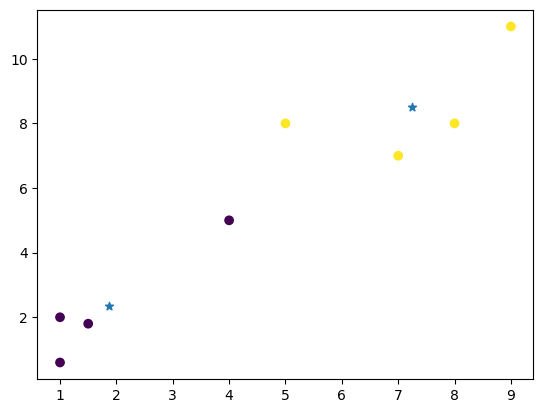

In [11]:
centers=kmeans.cluster_centers_
plt.scatter(x[:,0],x[:,1],c=y) # 预测结果
plt.scatter(centers[:,0],centers[:,1],marker='*') # 画出两个簇的质心


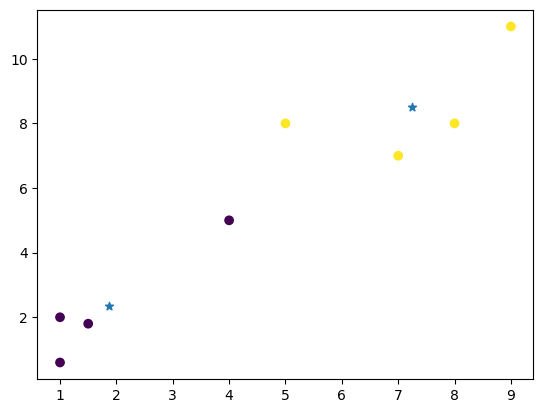

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11], [7, 7],[4, 5]])
k=2
iterations=10
tol=0.01

# 随机初始化质心
# 从n条数据中随机选择K条，作为初始中心向量
def random_initial_centers(data,k):
    centers_id=np.random.randint(0,len(data),k)
    centers=data[centers_id]
    return centers

# 样本点分类
def samples_classify(data,centers,k):
    c=np.zeros(len(data))
    var=0 # k个质心与每个点之间的距离总和

    for i in range(len(data)):
        # 计算k个质心与每个点之间的距离
        dis=(np.tile(data[i],(k,1))-centers)**2  # np.tile(a,(x,y,z))表示将数组a在行上重复x次，在列上重复y次，在第三维度重复z次
        ad_dis=dis.sum(axis=1)  # 每一行相加，共k行
        sq_dis=ad_dis**0.5
        var=var+sum(sq_dis)
        # 分组:取距离最小的索引为当前点的分组
        c[i]=np.argmin(sq_dis)

    return c,var


# 更新样本质点
def renew_centers(data,centers,c,k):
    # 对分类c中每一类求其坐标均值，得到新的样本质点
    for i in range(k):
        index=np.where(c==i)[0]  # 选择出分类c中等于i的
        centers[i]=data[index].sum(axis=0)/len(index)
    return centers

# 需要聚类的数据data
# K 聚类的个数
# tol 聚类的容差，即ΔJ
# 聚类迭代都最大次数N
def kmeans_main(data,k,tol,iterations):
    centers=random_initial_centers(data,k)
    c,var=samples_classify(data,centers,k)
    last_var=1e-9
    count=0

    # 当ΔJ大于容差且循环次数小于迭代次数，一直迭代。负责结束聚类
    while(abs(var-last_var)>tol and count<iterations):
        last_var=var
        c,var=samples_classify(data,centers,k)
        centers=renew_centers(data,centers,c,k)
        count=count+1

    return c,centers

c,centers=kmeans_main(data,k,tol,iterations)

plt.scatter(data[:,0],data[:,1],c=c) # 预测结果
plt.scatter(centers[:,0],centers[:,1],marker='*') # 画出两个簇的质心
